# El Método de Runge-Kutta

## Introducción

Nos hemos dado cuenta que **es posible que el método de Euler falle**.

Por esto, nos disponemos a crear otro método numérico que sea más apropiado en una amplia gama de problemas.

Para visualizar a lo que se comenta, observe la siguiente imagen (tomada de [Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Runge-kutta.svg/1024px-Runge-kutta.svg.png)):

![Metodos](https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Runge-kutta.svg/1024px-Runge-kutta.svg.png)

De esta imagen podemos observar que, entre todos los métodos numéricos mostrados, Euler es el que tiene la aproximación más pobre (suponiendo que tenemos nuestra solución exacta, claro).

En este sección veremos el famoso método numérico conocido como **Runge-Kutta**.

Recordemos, nuestro problema principal es

$$\frac{dx}{dt}=f(t,x),\text{     }x(t_{0})=x_{0}$$

esto es, la tasa de cambio instantáneo de la cantidad dependiente $x$, se puede modelar mediante la función $f(t,x)$. Además el experimento comienza en el momento $t_0$ con una cantidad inicial $x_0$ de la cantidad $x$.

## Procedimiento

### Algoritmo

Tomado de [wiki](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods), podemos resumir el método numérico como:

$$
\begin{split}
k_1 &=f(t_i,x_i) \\
k_2 &=f\biggl(t_i+\frac{h}{2},x_i+h\frac{k_1}{2}\biggr) \\
k_3 &=f\biggl(t_i+\frac{h}{2},x_i+h\frac{k_1}{2}\biggr) \\
k_4 &=f\bigl(t_i+h,x_i+hk_3\bigr) \\
x_{i+1} &= x_i+\frac{1}{6}h\bigl(k_1+2k_2+2k_3+k_4\bigr) \\
\end{split}
$$

### Implementación

**Por favor, documentar adecuadamente el siguiente código:**

In [2]:
def RK4(f,x0,t0,tf,n):
    t=np.linspace(t0,tf,n)
    h=abs(t[1]-t[0])
    x=np.empty(n)
    x[0]=x0
    
    for i in range(n-1):
        k1=f(t[i],x[i])
        k2=f(t[i]+1/2*h,x[i]+h*1/2*k1)
        k3=f(t[i]+1/2*h,x[i]+h*1/2*k2)
        k4=f(t[i+1]    ,x[i]+h*k3)
        
        x[i+1]=x[i]+1/6*h*(k1+2*k2+2*k3+k4)
    return t,x

Es claro que esta debe ser la función de un módulo, junto con ```EulerM```.

Resolvamos la siguiente ecuación:

$$\frac{dx}{dt}=\sin(t²),\text{    }x(0)=0$$

Recordemos que 

$$\int \sin(t²)dt$$

**No es posible resolverla** por métodos de Mate II y de hecho, es imposible escribirla como una función de las elementales que conocemos (Fuente).

Esta integral se conoce como la **integral de Fresnel**, que son de gran uso en el campo de la óptica. 

**Por favor, documente el siguiente código adecuadamente.**

54.122667399443024


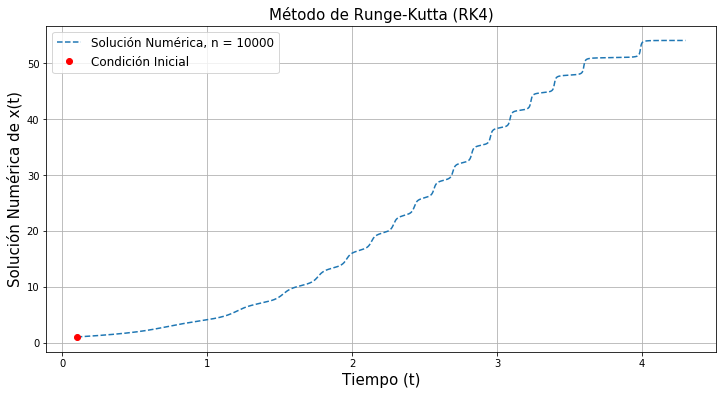

In [86]:
import numpy as np
import matplotlib.pyplot as plt
f = lambda t,x: 1.581*x-0.8*x*np.log(x)*np.cos(x)*np.sin(x)
x0=1
t0=0.1
tf=4.3
n=10000
t,x=RK4(f,x0,t0,tf,n)
plt.figure(figsize=(12,6))
plt.plot(t,x,'--',label="Solución Numérica, n = "+str(n))
plt.plot(t[0],x[0],'ro', label="Condición Inicial")
plt.xlabel("Tiempo (t)",fontsize=15)
plt.ylabel("Solución Numérica de x(t)",fontsize=15)
plt.title("Método de Runge-Kutta (RK4)",fontsize=15)
print(x[-1])
plt.legend(fontsize=12)
plt.grid()
plt.show()

Si aumentamos el parámetro $n$, o sea si dividimos en intervalo en más partes, deberiamos esperar una mejor aproximación, pues esto implicaría aproximarnos más y más a la derivada teórica. Miremos:

### Tarea

Resuelva las siguientes ecuaciones usando el método de Runge-Kutta, compare los resultados con los obtenidos del método de Euler y muestre para cuál $n$ la solución se vuelve estable:

1.
$$\frac{dP}{dt}=kP,\text{   }P(0)=2,\text{   en  }T=[0,100]$$
2.
$$\frac{dP}{dt}=kP\biggl(1-\frac{P}{S}\biggr),\text{   }P(0)=2,\text{   en  }T=[0,100],\text{   }S=100000$$
3.
$$\frac{dv}{dt}=g-\frac{c_d}{m}v^{2},\text{   }v(0)=-3,\text{   en  }T=[0,30]$$
4.
$$\frac{dx}{dt}=e^{-t^2}\sinh(x), \text{  }x(-5)=0$$
5.
$$\frac{dx}{dt}=\tanh(xt)+\ln(t^2)e^{-x^2}, \text{  }x(-1)=2$$